# Tutorial: u-v analysis of interferometric data

First, import some needed python packages

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import pickle
import os
%matplotlib inline

### Point source at field center
Then, let's read in some real ALMA interferometric data containing observations of the nearby star Vega (where we however increased its flux from 2.5 to 100 mJy), as arrays of ui, vi, Re(Vi), Im(Vi), wi at each u-v coordinate (baseline) i.

In [2]:
#Name of visibility file containing data:
vis = 'data/HD172167_calibratedvis_cont_12m_2_selfcaled_phaseshifted_ampscaled.npy'
#Read in:
u, v, Re, Im, w = np.load(vis)
Re+=97.5e-3 #Make star brighter for it to be obviously above the noise in the visibility data

FileNotFoundError: [Errno 2] No such file or directory: 'data/HD172167_calibratedvis_cont_12m_2_selfcaled_phaseshifted_ampscaled.npy'

First, lets get an idea of the u-v coverage of this specific observation

Text(0, 0.5, 'v (klambda)')

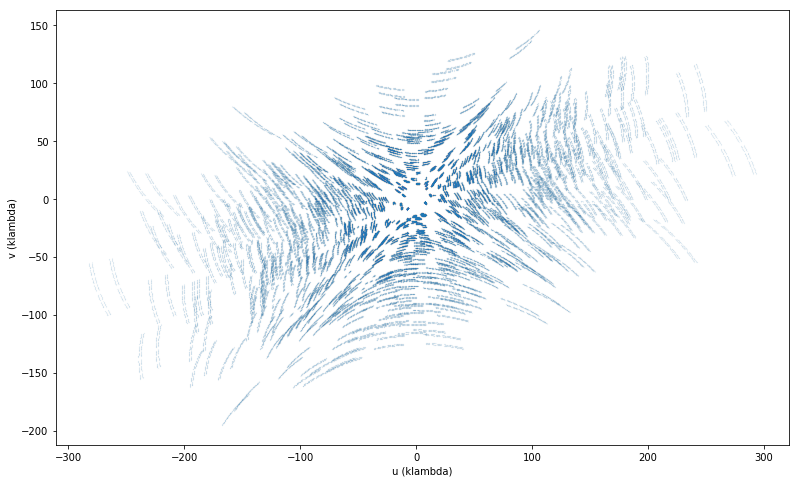

In [ ]:
fig=pl.figure(figsize=(15,8))
ax=fig.add_subplot(111)
ax.plot(u/1e3,v/1e3, '.', alpha=1.0, ms=0.05)
ax.set_aspect(aspect=1.0)
ax.set_xlabel('u (klambda)')
ax.set_ylabel('v (klambda)')

Very elongated E-W compared to N-S. This is because the source was very far North, and only barely rose above horizon North of the telescope. Therefore, N-S *projected* baselines are very short!

Now plot Real and Imaginary part at each u-v point as colorscale:

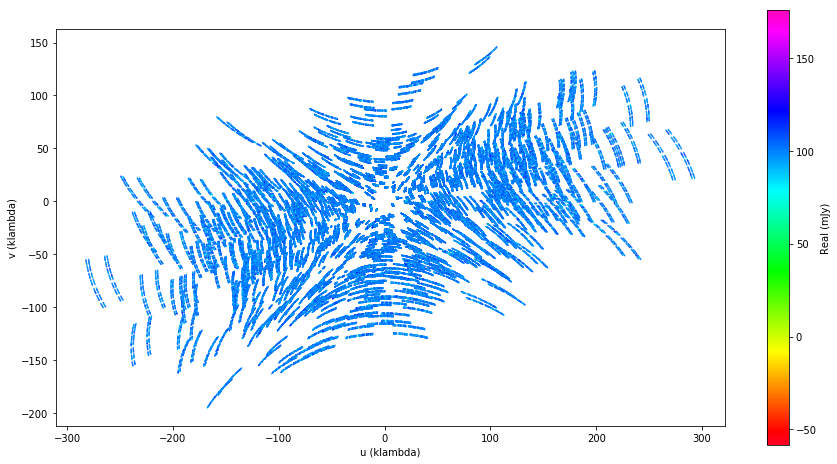

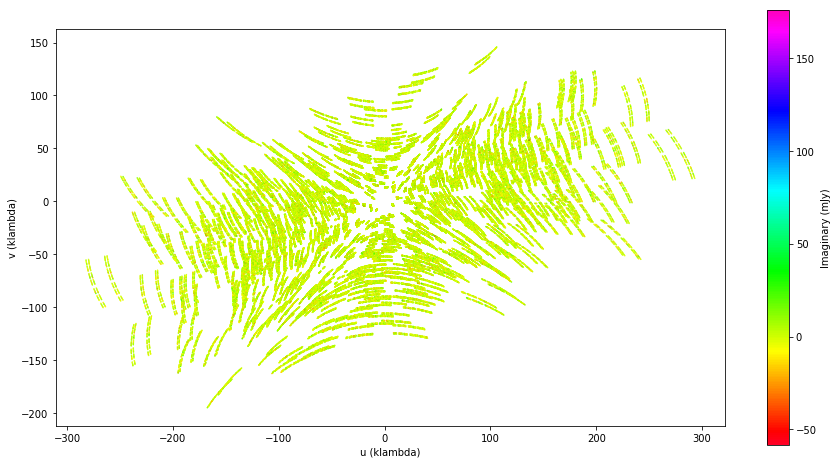

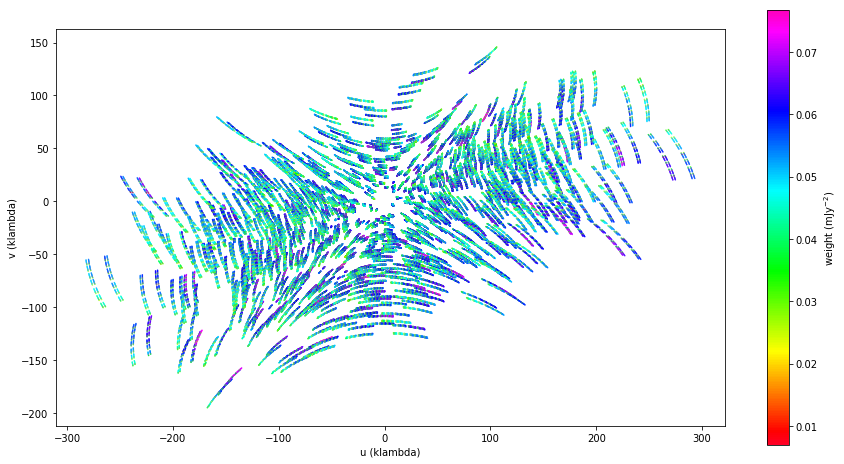

In [ ]:
#Real
fig=pl.figure(figsize=(15,8))
ax=fig.add_subplot(111)
im = ax.scatter(u/1e3,v/1e3, marker='.', c=Re*1e3, vmin=1.0*np.min(Im)*1e3, vmax=1.0*np.max(Re)*1e3, alpha=1.0, s=0.5, cmap='gist_rainbow')
ax.set_aspect(aspect=1.0)
ax.set_xlabel('u (klambda)')
ax.set_ylabel('v (klambda)')
pl.colorbar(im, label='Real (mJy)')

#Imaginary
fig=pl.figure(figsize=(15,8))
ax=fig.add_subplot(111)
im = ax.scatter(u/1e3,v/1e3, marker='.', c=Im*1e3, vmin=1.0*np.min(Im)*1e3, vmax=1.0*np.max(Re)*1e3, alpha=1.0, s=0.5, cmap='gist_rainbow')
ax.set_aspect(aspect=1.0)
ax.set_xlabel('u (klambda)')
ax.set_ylabel('v (klambda)')
pl.colorbar(im, label='Imaginary (mJy)')

#Weights
fig=pl.figure(figsize=(15,8))
ax=fig.add_subplot(111)
im = ax.scatter(u/1e3,v/1e3, marker='.', c=w/1e6, vmin=1.0*np.min(w)/1e6, vmax=1.0*np.max(w)/1e6, alpha=1.0, s=0.5, cmap='gist_rainbow')
ax.set_aspect(aspect=1.0)
ax.set_xlabel('u (klambda)')
ax.set_ylabel('v (klambda)')
pl.colorbar(im, label=r'weight (mJy$^{-2}$)')


Real and Imaginary u-v measurements just look like (Gaussian) noise, because emission is too faint to be detected on a single u-v point. Weights of 0.01-0.07 mJy-2 indicate a noise level (uncertainty) of 1/sqrt(wt) ~ 4-10 mJy per u-v point.

To decrease noise level, and judge how much emission is on different baselines, it is useful to plot of the real and imaginary component of the visibilities as a function of u-v distance, where uvdist=np.sqrt(u^2+v^2). This is equivalent to averaging azimuthally in u-v space over concentric annuli!

In [ ]:
#First make visibility bins and empty arrays needed
uvmax=280. #in klambda
nbins=150.
binneduvdist=(np.arange(nbins)+1.0)/nbins*uvmax
binwidth=uvmax/nbins
uvdist=np.sqrt(u**2.0+v**2.0)/1e3 #klambda
binnedRe=np.zeros(int(nbins))
binnedunc=np.zeros(int(nbins))
binnedIm=np.zeros(int(nbins))

#Loop over bins and calculate average Re, Im and unc using weighted averages.
for i in np.arange(binneduvdist.size):
    ind=np.where((uvdist>(binneduvdist[i]-binwidth/2.0))&(uvdist<=(binneduvdist[i]+binwidth/2.0)))
    binnedRe[i]=np.sum(Re[ind]*w[ind])/np.sum(w[ind]) #weighted average
    binnedIm[i]=np.sum(Im[ind]*w[ind])/np.sum(w[ind]) #weighted average
    binnedunc[i]=1./np.sqrt(np.sum(w[ind]))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(0, 0.5, 'Imaginary (mJy)')

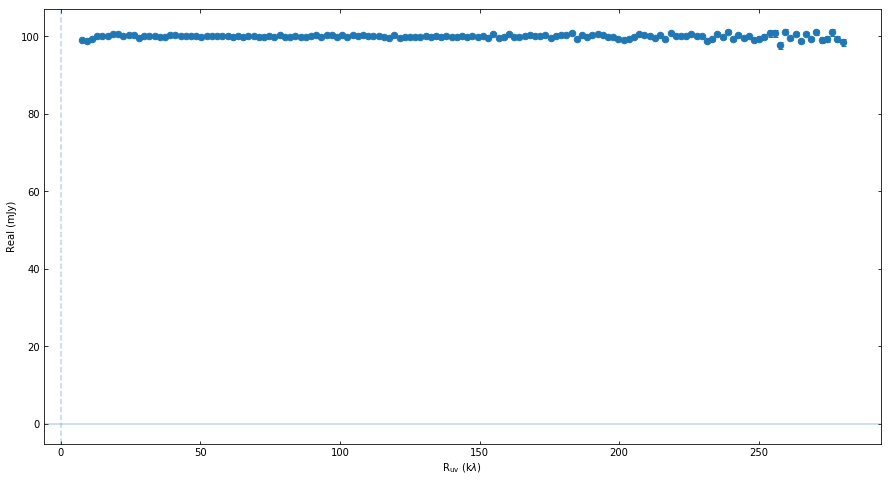

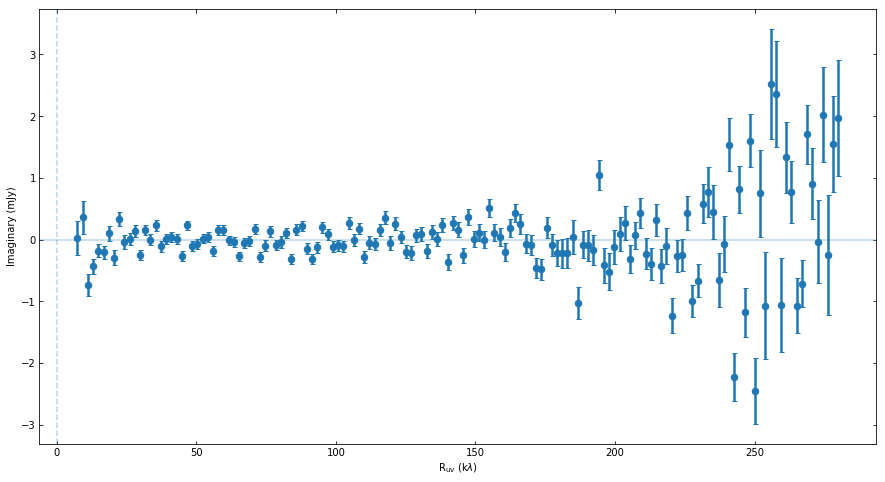

In [ ]:
#Plot results for Reals
fig=pl.figure(figsize=(15,8))
ax1=fig.add_subplot(111)
ax1.errorbar(binneduvdist, 1e3*binnedRe, yerr=1e3*binnedunc, fmt='.', linewidth=2.5, capsize=2.5, markersize=13, elinewidth=0., zorder=-32, label='Data')
ax1.axvline(uvdist.min()/1e3, alpha=0.3, linestyle='dashed')
ax1.axhline(0.0, alpha=0.3, linestyle='solid')
ax1.tick_params(axis='both', direction='in', top='on', right='on', labelbottom='on')
ax1.set_ylabel('Real (mJy)')
ax1.set_xlabel(r'R$_{\mathrm{uv}}$ (k$\lambda$)')

#Plot results for Imaginaries
fig=pl.figure(figsize=(15,8))
ax2=fig.add_subplot(111)
ax2.errorbar(binneduvdist, 1e3*binnedIm, yerr=1e3*binnedunc, fmt='.', linewidth=2.5, capsize=2.5, markersize=13, elinewidth=0., zorder=-32)
ax2.axvline(uvdist.min()/1.e3, alpha=0.3, linestyle='dashed')
ax2.axhline(0.0, alpha=0.3, linestyle='solid')
ax2.tick_params(axis='both', direction='in', top='on', right='on', labelbottom='on')
ax2.set_xlabel(r'R$_{\mathrm{uv}}$ (k$\lambda$)')
ax2.set_ylabel('Imaginary (mJy)')

Signal strongly detected in the real part of the visibilities, at ~2.5 mJy and mostly constant with u-v distance. Imaginaries mostly consistent with zero everywhere, so source consistent with being symmetric and centered on the phase (and pointing) center of the observations. Thus, u-v analysis alone indicates the presence of a point source in the center of the field, with a flux of ~2.5 mJy.

### Offset point source
What would it look like if the source was *not* in the field center? 

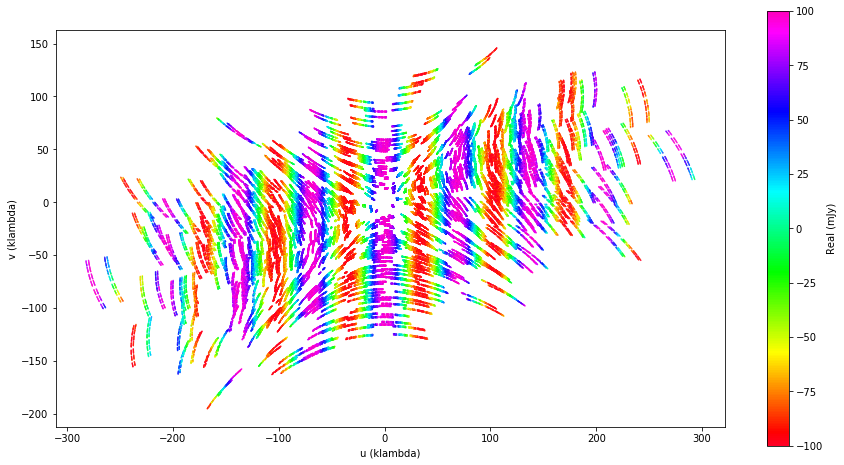

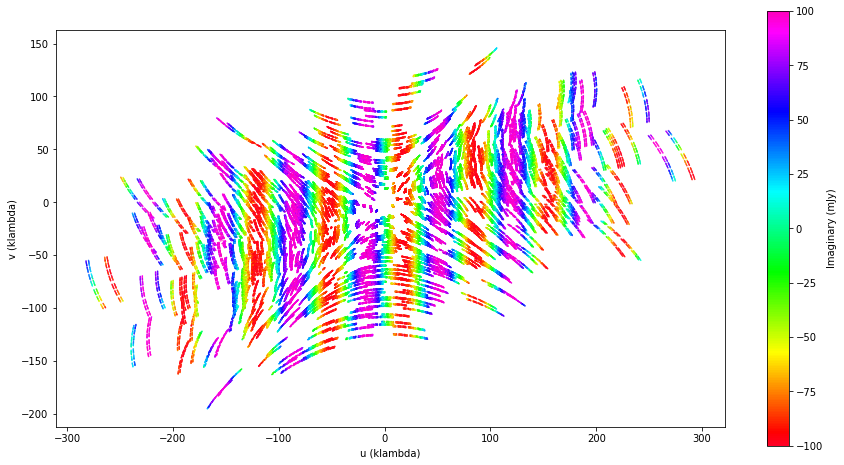

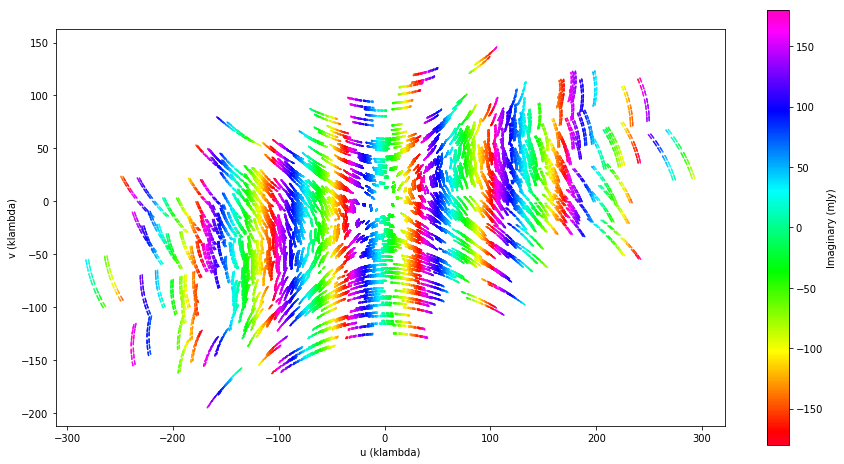

In [ ]:
#Create shifted dataset in the x direction by +3 arcsec
shiftarcsec=3.0
shiftuv=-2.0*np.pi*u*shiftarcsec*np.pi/180.0/3600.0
datash=(1*Re+1j*Im)*(1*np.cos(shiftuv)+1j*np.sin(shiftuv))
Resh=datash.real
Imsh=datash.imag

#2D plot Real
fig=pl.figure(figsize=(15,8))
ax=fig.add_subplot(111)
im = ax.scatter(u/1e3,v/1e3, marker='.', c=Resh*1e3, vmin=-100, vmax=100, alpha=1.0, s=0.5, cmap='gist_rainbow')
ax.set_aspect(aspect=1.0)
ax.set_xlabel('u (klambda)')
ax.set_ylabel('v (klambda)')
pl.colorbar(im, label='Real (mJy)')

#2D plot Imaginary
fig=pl.figure(figsize=(15,8))
ax=fig.add_subplot(111)
im = ax.scatter(u/1e3,v/1e3, marker='.', c=Imsh*1e3, vmin=-100, vmax=100, alpha=1.0, s=0.5, cmap='gist_rainbow')
ax.set_aspect(aspect=1.0)
ax.set_xlabel('u (klambda)')
ax.set_ylabel('v (klambda)')
pl.colorbar(im, label='Imaginary (mJy)')

Now, we see a sine wave in the u direction, which means the shift is in the RA direction in the plane of the sky. How offset is the point source?
The period of the wave can be shown to be equal to the inverse of the on-sky offset. The period looks to be about 70klambda, so the offset is ~1/70e3 radians, or ~1/70e3 x 3600 x 180/pi = 3 arcseconds along the RA direction!

What if the offset was at along a 30 degree position angle instead?

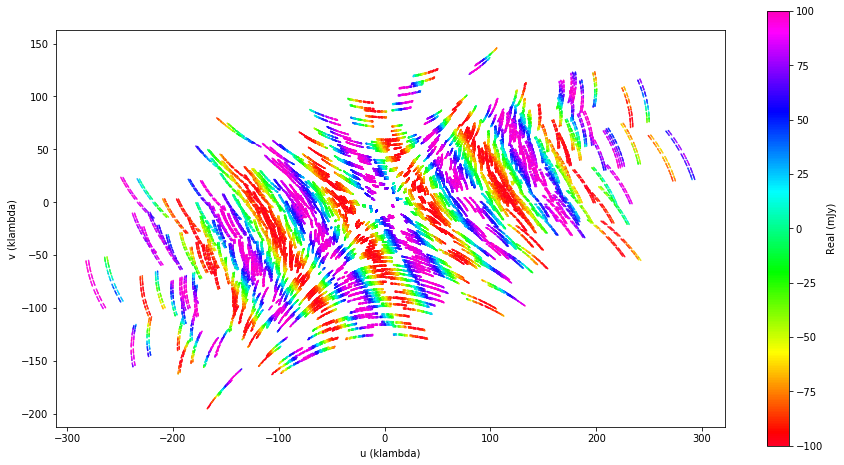

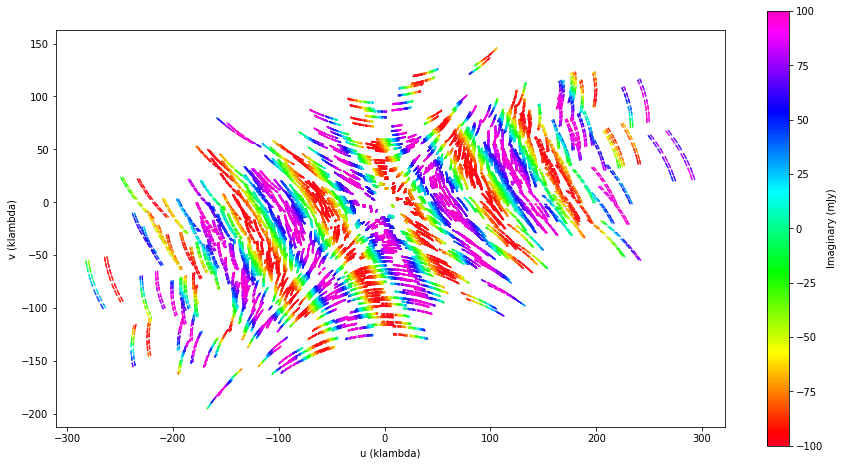

In [ ]:
#Create shifted dataset in the x direction by +3 arcsec
shiftarcsec=3.0 #arcsec
shiftangle=30.0 #degrees
shiftuv=-2.0*np.pi*u*shiftarcsec*np.cos(shiftangle*np.pi/180.0)*np.pi/180.0/3600.0-2.0*np.pi*v*shiftarcsec*np.sin(shiftangle*np.pi/180.0)*np.pi/180.0/3600.0
datash=(1*Re+1j*Im)*(1*np.cos(shiftuv)+1j*np.sin(shiftuv))
Resh=datash.real
Imsh=datash.imag

#2D plot Real
fig=pl.figure(figsize=(15,8))
ax=fig.add_subplot(111)
im = ax.scatter(u/1e3,v/1e3, marker='.', c=Resh*1e3, vmin=-100, vmax=100, alpha=1.0, s=0.5, cmap='gist_rainbow')
ax.set_aspect(aspect=1.0)
ax.set_xlabel('u (klambda)')
ax.set_ylabel('v (klambda)')
pl.colorbar(im, label='Real (mJy)')

#2D plot Imaginary
fig=pl.figure(figsize=(15,8))
ax=fig.add_subplot(111)
im = ax.scatter(u/1e3,v/1e3, marker='.', c=Imsh*1e3, vmin=-100, vmax=100, alpha=1.0, s=0.5, cmap='gist_rainbow')
ax.set_aspect(aspect=1.0)
ax.set_xlabel('u (klambda)')
ax.set_ylabel('v (klambda)')
pl.colorbar(im, label='Imaginary (mJy)')

The cosine (Real part) and sine (Imaginary part) waves are now along the PA of the offset. Remember that a rotation in image space corresponds to the same rotation in u-v space (Fourier Transform property)! 

### Ring morphology
Let's now look at more complex, but still simple, symmetric emission morphologies. What if instead of a star, we were looking at an axisymmetric, face-on thin ring, such as a Kuiper belt (debris disk) around a nearby star?
Let's use Python's Fast Fourier Transform utilities to inspect what that would look like.

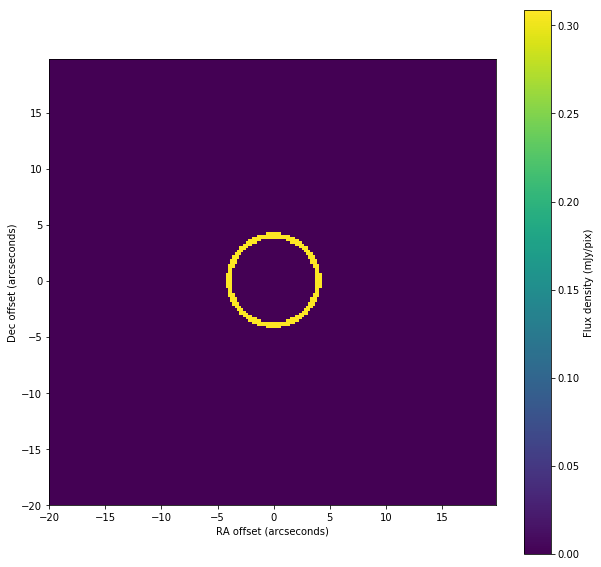

In [ ]:
#First, create an image of a ring, centered at the field center
r=4.0 #arcsec
width=0.5 #arcsec
fluxdensity=100.0 #mJy

pixsize=0.2  #Satisfy Nyquist criterion, in arcsec
imsize=40.0 #arcsec
npix=np.int(np.round(imsize/pixsize))#+1 #Make sure this is odd?
coords=np.arange(npix)*pixsize-npix/2.0*pixsize#+0.000001
xcoords2d=np.reshape(np.repeat(coords, npix), (npix,npix))
ycoords2d=xcoords2d.T
ringimage=np.zeros((npix,npix))
distimage=np.sqrt(xcoords2d**2.0+ycoords2d**2.0)
ringimage[(distimage>(r-width/2.0))&(distimage<(r+width/2.0))]=1.0
ringimage*=fluxdensity/np.sum(ringimage)
pl.figure(figsize=(10,10))
pl.imshow(ringimage, origin='lower', extent=[coords.min(), coords.max(), coords.min(), coords.max()])
pl.xlabel('RA offset (arcseconds)')
pl.ylabel('Dec offset (arcseconds)')
pl.colorbar(label='Flux density (mJy/pix)')

Now use numpy's fft routines to see what its Fourier Transform looks like.

Text(0, 0.5, 'v (klambda)')

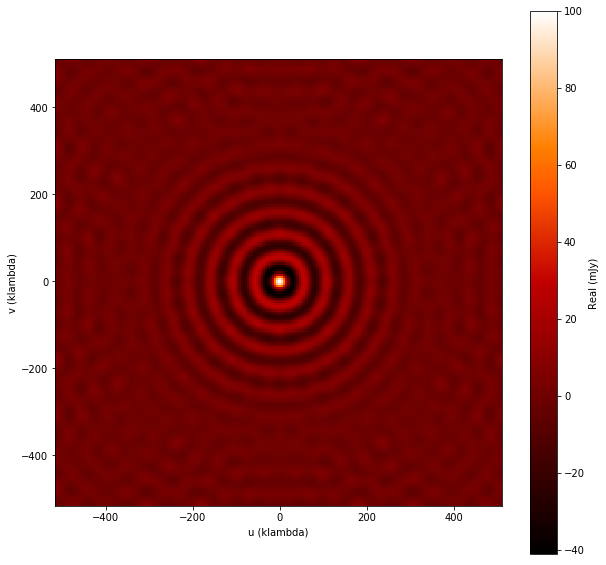

In [ ]:

#ringvisfunc=np.fft.fft2(ringimage)
ringvisfunc=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(ringimage)))
vispixsize=1./(npix*pixsize/3600.0*np.pi/180.0)/1e3 #klambda
viscoords=np.arange(npix)*vispixsize-vispixsize*npix/2.0
visucoords2d=np.reshape(np.repeat(viscoords, npix), (npix,npix))
visvcoords2d=visucoords2d.T
uvdistimage=np.sqrt(visucoords2d**2.0+visvcoords2d**2.0)

uvringreal=ringvisfunc.real
pl.figure(figsize=(10,10))
pl.imshow(uvringreal, origin='lower', cmap='gist_heat', interpolation='None', extent=[viscoords.min(),viscoords.max(),viscoords.min(),viscoords.max()])
pl.colorbar(label='Real (mJy)')
pl.xlabel('u (klambda)')
pl.ylabel('v (klambda)')

And check out its azimuthally averaged radial profile:

In [ ]:
#First make visibility bins and empty arrays needed
uvmax=uvdistimage.max() #in klambda
nbins=150.
binneduvdist=(np.arange(nbins)+1.0)/nbins*uvmax
binwidth=uvmax/nbins
uvdist=np.sqrt(visucoords2d.flatten()**2.0+visvcoords2d.flatten()**2.0) #klambda
binnedRe=np.zeros(int(nbins))
binnedunc=np.zeros(int(nbins))
binnedIm=np.zeros(int(nbins))

#Loop over bins and calculate average Re, Im and unc using weighted averages.
for i in np.arange(binneduvdist.size):
    ind=np.where((uvdist>(binneduvdist[i]-binwidth/2.0))&(uvdist<=(binneduvdist[i]+binwidth/2.0)))
    binnedRe[i]=np.mean(ringvisfunc.real.flatten()[ind]) #average
    binnedIm[i]=np.mean(ringvisfunc.imag.flatten()[ind]) #average
    #binnedunc[i]=1./np.sqrt(np.sum(w[ind]))

Text(0, 0.5, 'Imaginary (mJy)')

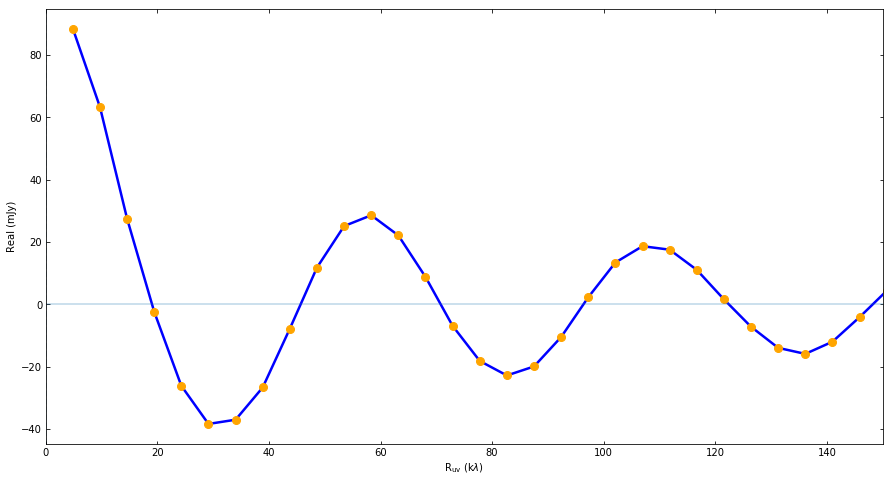

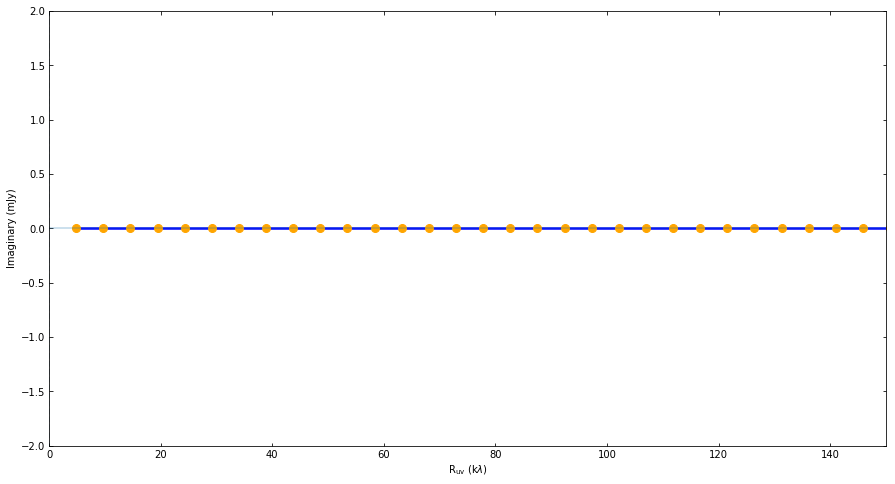

In [ ]:
#Plot results for Reals
fig=pl.figure(figsize=(15,8))
ax1=fig.add_subplot(111)
ax1.plot(binneduvdist, binnedRe, linewidth=2.5, markersize=3, label='Data', color='blue')
ax1.plot(binneduvdist, binnedRe, 'o', linewidth=2.5, markersize=8, label='Data', color='orange')
ax1.axvline(uvdist.min(), alpha=0.3, linestyle='dashed')
ax1.axhline(0.0, alpha=0.3, linestyle='solid')
ax1.tick_params(axis='both', direction='in', top='on', right='on', labelbottom='on')
ax1.set_ylabel('Real (mJy)')
ax1.set_xlabel(r'R$_{\mathrm{uv}}$ (k$\lambda$)')
ax1.set_xlim(0.0,150.0)



#Plot results for Imaginaries
fig=pl.figure(figsize=(15,8))
ax2=fig.add_subplot(111)
ax2.plot(binneduvdist, binnedIm, linewidth=2.5, markersize=3, color='blue')
ax2.plot(binneduvdist, binnedIm, 'o', linewidth=2.5, markersize=8, color='orange')
ax2.axvline(uvdist.min(), alpha=0.3, linestyle='dashed')
ax2.axhline(0.0, alpha=0.3, linestyle='solid')
ax2.tick_params(axis='both', direction='in', top='on', right='on', labelbottom='on')
ax2.set_xlabel(r'R$_{\mathrm{uv}}$ (k$\lambda$)')
ax2.set_ylim(-2.0,2.0)
ax2.set_xlim(0.0,150.0)
ax2.set_ylabel('Imaginary (mJy)')

As expected analytically (see e.g. Table 10.2 of Interf. and Synthesis Book) the Fourier Transform of a ring is a Bessel function giving a visibility function $\mathcal{\mathrm{Re}(V (q))}\propto J_0(2\pi r q)$ where q is the u-v distance in lambda, and r is the on-sky radius in radians. <br>
Remember, the zeroth order Bessel function of the first kind $J_0(x)$ has its first zero at $x=2.4048$.<br><br>
Thus, the first zero should be located at $2\pi rq=2.4048$, which implies the first null should be located at a uvdistance <br>

$$q = \frac{2.4048}{2\pi r}.$$<br>
**Therefore, we can use the uvdistance of the first zero, ~19.7 klambda, to derive a ring radius of $2.4048/(2\pi\times19.7e3)\times180/\pi\times3600$ = 4 arcsec.**

## Fitting in u-v space

A better way to robustly establish source morphologies and obtain best fit parameters with uncertainties is to fit the measured visibilities directly. This can be done in a few steps: <br>
$\ $$\ $$\ $$\ $ 1) create a parametrized model image of what you expect your object to look like (as we just did for the ring, for example, with parameters radius, width and flux density), <br>
$\ $$\ $$\ $$\ $ 2) Fourier Transforming to obtain the visibility function <br>
$\ $$\ $$\ $$\ $ 3) evaluating (interpolating) this model visibility function at the location of the observed u-v points. <br>
$\ $$\ $$\ $$\ $ 4) comparing these model (real and imaginary) visibility values to the observed ones with their uncertainty and, e.g., evaluate the chi^2 of this model. <br>
Fitting routines can then repeat this procedure iteratively and find best-fit model parameters!